In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.options.display.max_columns = None

# trip = pd.read_csv('JC-201612-citibike-tripdata.csv')
nhts = pd.read_csv('DAYV2PUB.csv')


In [7]:
nhts.head()

,HOUSEID,PERSONID,FRSTHM,OUTOFTWN,ONTD_P1,ONTD_P2,ONTD_P3,ONTD_P4,ONTD_P5,ONTD_P6,ONTD_P7,ONTD_P8,ONTD_P9,ONTD_P10,ONTD_P11,ONTD_P12,ONTD_P13,ONTD_P14,ONTD_P15,TDCASEID,HH_HISP,HH_RACE,DRIVER,R_SEX,WORKER,DRVRCNT,HHFAMINC,HHSIZE,HHVEHCNT,NUMADLT,FLAG100,LIF_CYC,TRIPPURP,AWAYHOME,CDIVMSAR,CENSUS_D,CENSUS_R,DROP_PRK,DRVR_FLG,EDUC,ENDTIME,HH_ONTD,HHMEMDRV,HHRESP,HHSTATE,HHSTFIPS,INTSTATE,MSACAT,MSASIZE,NONHHCNT,NUMONTRP,PAYTOLL,PRMACT,PROXY,PSGR_FLG,R_AGE,RAIL,STRTTIME,TRACC1,TRACC2,TRACC3,TRACC4,TRACC5,TRACCTM,TRAVDAY,TREGR1,TREGR2,TREGR3,TREGR4,TREGR5,TREGRTM,TRPACCMP,TRPHHACC,TRPHHVEH,TRPTRANS,TRVL_MIN,TRVLCMIN,TRWAITTM,URBAN,URBANSIZE,URBRUR,USEINTST,USEPUBTR,VEHID,WHODROVE,WHYFROM,WHYTO,WHYTRP1S,WRKCOUNT,DWELTIME,WHYTRP90,TDTRPNUM,TDWKND,TDAYDATE,TRPMILES,WTTRDFIN,VMT_MILE,PUBTRANS,HOMEOWN,HOMETYPE,HBHUR,HTRESDN,HTHTNRNT,HTPPOPDN,HTEEMPDN,HBRESDN,HBHTNRNT,HBPPOPDN,GASPRICE,VEHTYPE,HH_CBSA,HHC_MSA
0,20000017,1,1,-1,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,200000170101,2,1,1,1,2,2,18,3,3,3,1,10,HBO,-1,33,3,2,-1,2,3,1020,2,1,2,IN,18,1,3,3,0,2,2,6,1,1,75,2,955,-1,-1,-1,-1,-1,-1,4,-1,-1,-1,-1,-1,-1,1,1,1,3,25,25,-1,4,6,2,1,2,2,2,1,30,30,1,70,6,1,2,200904,22.000000,68170.670425,-1.0,2,1,1,TC,300,5,300,75,300,5,300,200.8,3,XXXXX,XXXX
1,20000017,1,1,-1,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,200000170102,2,1,1,1,2,2,18,3,3,3,1,10,NHB,-1,33,3,2,-1,2,3,1132,2,1,2,IN,18,2,3,3,0,2,-1,6,1,1,75,2,1130,-1,-1,-1,-1,-1,-1,4,-1,-1,-1,-1,-1,-1,1,1,1,3,2,2,-1,4,6,2,1,2,2,2,30,53,50,1,118,8,2,2,200904,0.222222,68170.670425,-1.0,2,1,1,TC,300,5,300,75,300,5,300,200.8,3,XXXXX,XXXX
2,20000017,1,1,-1,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,200000170103,2,1,1,1,2,2,18,3,3,3,1,10,HBSOCREC,-1,33,3,2,-1,2,3,1400,2,1,2,IN,18,1,3,3,0,2,2,6,1,1,75,2,1330,-1,-1,-1,-1,-1,-1,4,-1,-1,-1,-1,-1,-1,1,1,1,3,30,30,-1,4,6,2,1,2,2,2,53,1,1,1,230,8,3,2,200904,22.000000,68170.670425,-1.0,2,1,1,TC,300,5,300,75,300,5,300,200.8,3,XXXXX,XXXX
3,20000017,1,1,-1,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,200000170104,2,1,1,1,2,2,18,3,3,3,1,10,HBO,-1,33,3,2,-1,2,3,1825,2,1,2,IN,18,2,3,3,0,2,-1,6,1,1,75,2,1750,-1,-1,-1,-1,-1,-1,4,-1,-1,-1,-1,-1,-1,1,1,1,3,35,35,-1,4,6,2,1,2,2,2,1,22,20,1,95,5,4,2,200904,20.000000,68170.670425,-1.0,2,1,1,TC,300,5,300,75,300,5,300,200.8,3,XXXXX,XXXX
4,20000017,1,1,-1,1,1,2,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,200000170105,2,1,1,1,2,2,18,3,3,3,1,10,HBO,-1,33,3,2,-1,2,3,2035,2,1,2,IN,18,2,3,3,0,2,-1,6,1,1,75,2,2000,-1,-1,-1,-1,-1,-1,4,-1,-1,-1,-1,-1,-1,1,1,1,3,35,35,-1,4,6,2,1,2,2,2,22,1,1,1,-9,5,5,2,200904,20.000000,68170.670425,-1.0,2,1,1,TC,300,5,300,75,300,5,300,200.8,3,XXXXX,XXXX


In [9]:
nhts.shape

(1167321, 112)

In [13]:
nhts_city = nhts.loc[nhts['HHC_MSA'] == '1602']

In [14]:
nhts_city.shape

(6965, 112)

In [91]:
subset_city = nhts_city[['TRPTRANS','HHFAMINC','HHSIZE','WHYTRP1S','EDUC','TRPMILES','GASPRICE','R_AGE','STRTTIME','HBRESDN','HHVEHCNT']]                                                                                    

In [92]:
subset_city.head()

,TRPTRANS,HHFAMINC,HHSIZE,WHYTRP1S,EDUC,TRPMILES,GASPRICE,R_AGE,STRTTIME,HBRESDN,HHVEHCNT
115,1,18,3,70,5,5.0,164.4,47,735,750,2
116,1,18,3,10,5,24.0,164.4,47,800,750,2
117,1,18,3,1,5,29.0,164.4,47,1605,750,2
118,1,18,3,10,4,29.0,164.4,47,530,750,2
119,1,18,3,1,4,29.0,164.4,47,1100,750,2


In [93]:
subset_city.shape

(6965, 11)

In [94]:
# subset_city = subset_city[~subset_city['TRPTRANS'].isin(['-1','-7','-8','-9'])]
subset_city = subset_city[subset_city['TRPTRANS']>0]
subset_city.shape


(6960, 11)

In [95]:
subset_city = subset_city[subset_city['HHFAMINC']>0]
subset_city.shape

(6391, 11)

In [96]:
subset_city = subset_city[subset_city['WHYTRP1S']>0]
subset_city.shape

(6390, 11)

In [97]:
subset_city = subset_city[subset_city['EDUC']>0]
subset_city.shape

(5439, 11)

In [98]:
subset_city = subset_city[subset_city['TRPMILES']>0]
subset_city.shape

(5375, 11)

In [99]:
subset_city = subset_city[subset_city['STRTTIME']>0]
subset_city.shape

(5361, 11)

In [100]:
subset_city = subset_city[subset_city['HBRESDN']>0]
subset_city.shape

(5361, 11)

In [101]:
# 1 - car; 2 - public transit; 3- walk; 4 - bike; 5 - Ferry & airplane 6 - Others 
modes_list = [(1,1),(2,1),(3,1),(4,1),(5,1),(6,1),(7,1),(8,1),(9,2),(10,2),(11,2),(12,2),(13,2),(14,2),(15,2),(16,2),(17,2),
              (18,2),(19,1),(20,5),(21,5),(22,4),(23,3),(24,6),(97,6)]
labels = ['TRPTRANS','simple_mode']
mode_table = pd.DataFrame.from_records(modes_list, columns=labels)

In [102]:
city_modes = pd.merge(subset_city, mode_table, on=['TRPTRANS'], how='left')

In [103]:
city_modes.head()

,TRPTRANS,HHFAMINC,HHSIZE,WHYTRP1S,EDUC,TRPMILES,GASPRICE,R_AGE,STRTTIME,HBRESDN,HHVEHCNT,simple_mode
0,1,18,3,70,5,5.0,164.4,47,735,750,2,1
1,1,18,3,10,5,24.0,164.4,47,800,750,2,1
2,1,18,3,1,5,29.0,164.4,47,1605,750,2,1
3,1,18,3,10,4,29.0,164.4,47,530,750,2,1
4,1,18,3,1,4,29.0,164.4,47,1100,750,2,1


In [104]:
city_modes = city_modes[city_modes.simple_mode != 6]

In [106]:
city_modes['WHYTRP1S'] = city_modes['WHYTRP1S'].apply(str)
city_modes['EDUC'] = city_modes['EDUC'].apply(str)
city_modes['HBRESDN'] = city_modes['HBRESDN'].apply(str)

In [107]:
city_modes.dtypes

TRPTRANS         int64
HHFAMINC         int64
HHSIZE           int64
WHYTRP1S        object
EDUC            object
TRPMILES       float64
GASPRICE       float64
R_AGE            int64
STRTTIME         int64
HBRESDN         object
HHVEHCNT         int64
simple_mode      int64
dtype: object

# Dummy variables

In [110]:
# generate dummy variables
dummy_df = pd.get_dummies(city_modes[['WHYTRP1S','EDUC','HBRESDN']]) 
dat_final = pd.concat([city_modes,dummy_df], axis = 1)
dat_final.drop(['TRPTRANS','WHYTRP1S','EDUC','HBRESDN'],axis = 1, inplace = True)

In [111]:
dat_final.head()

,HHFAMINC,HHSIZE,TRPMILES,GASPRICE,R_AGE,STRTTIME,HHVEHCNT,simple_mode,WHYTRP1S_1,WHYTRP1S_10,WHYTRP1S_20,WHYTRP1S_30,WHYTRP1S_40,WHYTRP1S_50,WHYTRP1S_60,WHYTRP1S_70,WHYTRP1S_80,WHYTRP1S_97,EDUC_1,EDUC_2,EDUC_3,EDUC_4,EDUC_5,HBRESDN_1500,HBRESDN_17000,HBRESDN_300,HBRESDN_3000,HBRESDN_30000,HBRESDN_50,HBRESDN_7000,HBRESDN_750
0,18,3,5.0,164.4,47,735,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,18,3,24.0,164.4,47,800,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,18,3,29.0,164.4,47,1605,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,18,3,29.0,164.4,47,530,2,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,18,3,29.0,164.4,47,1100,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [112]:
dat_final.shape

(5344, 31)

In [113]:
dat_final.isnull().sum()

HHFAMINC         0
HHSIZE           0
TRPMILES         0
GASPRICE         0
R_AGE            0
STRTTIME         0
HHVEHCNT         0
simple_mode      0
WHYTRP1S_1       0
WHYTRP1S_10      0
WHYTRP1S_20      0
WHYTRP1S_30      0
WHYTRP1S_40      0
WHYTRP1S_50      0
WHYTRP1S_60      0
WHYTRP1S_70      0
WHYTRP1S_80      0
WHYTRP1S_97      0
EDUC_1           0
EDUC_2           0
EDUC_3           0
EDUC_4           0
EDUC_5           0
HBRESDN_1500     0
HBRESDN_17000    0
HBRESDN_300      0
HBRESDN_3000     0
HBRESDN_30000    0
HBRESDN_50       0
HBRESDN_7000     0
HBRESDN_750      0
dtype: int64

# Split training and testing data

In [114]:
from sklearn.model_selection import train_test_split

X = dat_final.drop(['simple_mode'], axis=1)
y = dat_final[['simple_mode']]
d_X_train, d_X_test, d_y_train, d_y_test = train_test_split(X, y, test_size=0.2,  random_state=0)

# Standardization

In [118]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
d_X_train_scale = scaler.fit_transform(d_X_train)
d_X_train_scale = pd.DataFrame(d_X_train_scale)
d_X_train_scale.columns = d_X_train.columns
d_X_train_scale.describe()
d_X_test_scale = scaler.transform(d_X_test)
d_X_test_scale = pd.DataFrame(d_X_test_scale)
d_X_test_scale.columns = d_X_train.columns
d_X_test_scale.describe()

,HHFAMINC,HHSIZE,TRPMILES,GASPRICE,R_AGE,STRTTIME,HHVEHCNT,WHYTRP1S_1,WHYTRP1S_10,WHYTRP1S_20,WHYTRP1S_30,WHYTRP1S_40,WHYTRP1S_50,WHYTRP1S_60,WHYTRP1S_70,WHYTRP1S_80,WHYTRP1S_97,EDUC_1,EDUC_2,EDUC_3,EDUC_4,EDUC_5,HBRESDN_1500,HBRESDN_17000,HBRESDN_300,HBRESDN_3000,HBRESDN_30000,HBRESDN_50,HBRESDN_7000,HBRESDN_750
count,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000,1069.000000
mean,0.724701,0.226964,0.006874,0.495954,0.463252,0.563637,0.282507,0.367633,0.123480,0.018709,0.018709,0.205800,0.110384,0.025257,0.054256,0.067353,0.008419,0.033676,0.266604,0.271282,0.251637,0.176801,0.276894,0.029935,0.238541,0.156221,0.007484,0.042095,0.078578,0.170253
std,0.295495,0.168848,0.073377,0.385000,0.214375,0.187027,0.140626,0.482386,0.329141,0.135559,0.135559,0.404474,0.313514,0.156979,0.226629,0.250749,0.091411,0.180479,0.442391,0.444829,0.434157,0.381679,0.447673,0.170486,0.426391,0.363234,0.086224,0.200901,0.269205,0.376030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.034335,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.529412,0.125000,0.000428,0.118848,0.310811,0.420601,0.125000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.882353,0.125000,0.001873,0.480992,0.459459,0.562232,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.375000,0.004282,0.867947,0.608108,0.697425,0.375000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,2.167693,1.000000,1.000000,0.978541,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Modelling

In [119]:
def compute_ks(data):

    sorted_list = data.sort_values(['predict'], ascending=[True])

    total_bad = sorted_list['label'].sum(axis=None, skipna=None, level=None, numeric_only=None) / 3
    total_good = sorted_list.shape[0] - total_bad

    # print "total_bad = ", total_bad
    # print "total_good = ", total_good

    max_ks = 0.0
    good_count = 0.0
    bad_count = 0.0
    for index, row in sorted_list.iterrows():
        if row['label'] == 3:
            bad_count += 1.0
        else:
            good_count += 1.0

        val = bad_count/total_bad - good_count/total_good
        max_ks = max(max_ks, val)

    return max_ks

In [120]:
from sklearn.ensemble import RandomForestRegressor


# test_pd = pd.DataFrame()
# test_pd['predict'] = est.predict(d_X_test)
# test_pd['label'] = d_y_test

clf1 = RandomForestRegressor(n_jobs=-1, max_depth=10,random_state=0)
clf1.fit(d_X_train_scale, d_y_train)
print(clf1.score(d_X_test_scale, d_y_test))
test_pd1 = pd.DataFrame()
test_pd1['predict'] = clf1.predict(d_X_test_scale)
test_pd1['label'] = d_y_test
print(compute_ks(test_pd1[['label','predict']]))
print(clf1.feature_importances_)
# Top Ten
feature_importance = clf1.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-20:]
plt.barh(np.arange(20), feature_importance[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(20 + 0.25), np.array(d_X_train_scale.columns)[indices])
plt.xlabel('Relative importance'), plt.title('Top Ten Important Variables')

C:\Users\kouz\Anaconda3\lib\site-packages\ipykernel\__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.530350011446
0.0
[  3.81748035e-02   1.34135226e-02   4.72976473e-01   6.41560073e-02
   7.76957533e-02   9.08534515e-02   3.83467335e-02   6.89908991e-03
   6.04726382e-03   2.20203105e-04   0.00000000e+00   2.15011193e-02
   3.15168028e-02   4.94255045e-03   5.65372124e-03   1.31664958e-02
   4.96137475e-03   6.12998802e-03   1.05988806e-02   8.43978219e-03
   6.53287626e-03   9.71256723e-03   5.88719937e-03   1.24191894e-02
   5.15456081e-03   1.18438462e-02   6.68512939e-03   2.15376174e-03
   1.38817511e-02   1.00351020e-02]


(<matplotlib.text.Text at 0x1952e6fc940>,
 <matplotlib.text.Text at 0x1952e549f98>)

In [123]:
import os
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
os.environ["OMP_NUM_THREADS"] = "4" 
rng = np.random.RandomState(0)
import warnings
warnings.filterwarnings("ignore")

param_grid = {
              'max_depth': [5, 6, 8],
              'n_estimators': [600, 800, 1000, 1200],
              'learning_rate': [0.1],
              'gamma':[0, 0.2],
              'subsample': [0.8],
              'colsample_bylevel':[0.8]
             }


xgb_model = xgb.XGBRegressor()
xgb_model = GridSearchCV(xgb_model, param_grid, n_jobs=24, cv = 5)
xgb_model.fit(d_X_train_scale, d_y_train)
print(xgb_model.best_score_)
print(xgb_model.best_params_)

0.619601382135
{'colsample_bylevel': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 1200, 'subsample': 0.8}


In [130]:
# XGBoost test
clf2 = xgb.XGBRegressor(n_estimators=800, max_depth=5, 
                            learning_rate=0.01, subsample=0.8, colsample_bylevel=0.8, seed=0,
                             gamma=0.2)



clf2.fit(d_X_train_scale, d_y_train)
# d_y_pred = clf2.predict(d_X_test_scale)
# print(r2_score(d_y_test,d_y_pred))
print(clf2.score(d_X_test_scale, d_y_test))

test_pd2 = pd.DataFrame()
test_pd2['predict'] = clf2.predict(d_X_test_scale)
test_pd2['label'] = d_y_test
print(compute_ks(test_pd2[['label','predict']]))
print(clf2.feature_importances_)
# Top Ten
feature_importance = clf2.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())

indices = np.argsort(feature_importance)[-10:]
plt.barh(np.arange(10), feature_importance[indices],color='dodgerblue',alpha=.4)
plt.yticks(np.arange(10 + 0.25), np.array(X.columns)[indices])
plt.xlabel('Relative importance'), plt.title('Top 10 Important Variables')

0.577383728442
0.0
[  7.52970800e-02   4.04687598e-02   2.12748483e-01   1.22556269e-01
   1.08592078e-01   1.37287110e-01   4.90663163e-02   1.05689717e-02
   4.59996704e-03   4.43568267e-03   1.09523025e-04   1.41832316e-02
   2.50260122e-02   1.05689717e-02   7.66661204e-03   9.58326459e-03
   1.14451563e-02   1.05142109e-02   1.28141940e-02   7.66661204e-03
   1.08427797e-02   1.56070311e-02   1.02951648e-02   1.24308635e-02
   7.50232721e-03   1.65379774e-02   1.14451563e-02   3.99759039e-03
   2.12474670e-02   1.48951318e-02]


(<matplotlib.text.Text at 0x19531d1ceb8>,
 <matplotlib.text.Text at 0x19531d4de48>)

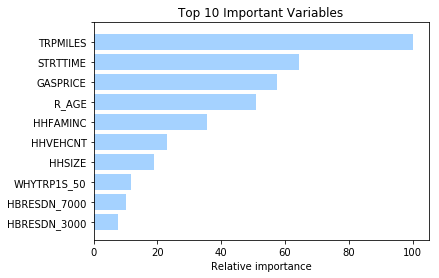

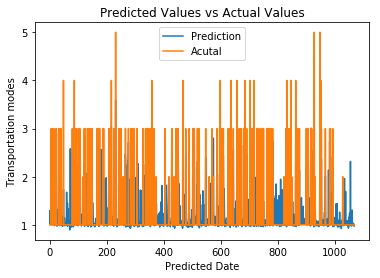

In [131]:
import matplotlib.pyplot as plt


plt.figure()

plt.plot(range(len(test_pd2['predict'])), test_pd2['predict'])
plt.plot(range(len(test_pd2['predict'])), d_y_test['simple_mode'])

# fig, ax = plt.subplots(figsize=(18, 8),)
# ax.plot(range(len(test_pd2['predict'])), test_day.load.values, label = 'predict', color = 'blue', linewidth=3)
# ax.plot(range(len(test_pd2['predict'])), test_day.timestamp.values, predictions, ls= 'dashed', lw=2,\
#             label = "Dan's predicted load,R^2 = {0:.3f}, MAPE = {1:.3f}".format(score,mape), color= 'red')


plt.legend(['Prediction', 'Acutal'])
plt.ylabel("Transportation modes")
plt.xlabel("Predicted Date")
plt.title("Predicted Values vs Actual Values")
plt.show()

# Neural Network

In [133]:
# Train a neural network in just 3 lines of code!
#
# the notes for this class can be found at: 
# https://deeplearningcourses.com/c/data-science-deep-learning-in-python
# https://www.udemy.com/data-science-deep-learning-in-python
from __future__ import print_function, division
from builtins import range
# Note: you may need to update your version of future
# sudo pip install -U future


import sys
sys.path.append('../ann_logistic_extra')
# from process import get_data

from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle


In [134]:
# create the neural network
model = MLPClassifier(hidden_layer_sizes=(20, 20), max_iter=2000)

# train the neural network
model.fit(d_X_train_scale, d_y_train)

# print the train and test accuracy
train_accuracy = model.score(d_X_train_scale, d_y_train)
test_accuracy = model.score(d_X_test_scale, d_y_test)
print("train accuracy:", train_accuracy, "test accuracy:", test_accuracy)

train accuracy: 0.883274853801 test accuracy: 0.860617399439
